<a href="https://colab.research.google.com/github/rajaskakodkar/guitar-classifier/blob/master/guitar-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 51kB 3.9MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 358kB 30.4MB/s 
     |████████████████████████████████| 1.0MB 40.2MB/s 
     |████████████████████████████████| 40kB 6.7MB/s 
     |████████████████████████████████| 92kB 12.2MB/s 
     |████████████████████████████████| 10.5MB 54.1MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 2.6MB 50.5MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 1.1.1 which is incompatible.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdri

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

urls=Array.from(document.querySelectorAll("a.iusc")).reduce((acc, el) => el.hasAttribute("m") ? acc.concat(JSON.parse(el.getAttribute("m")).murl) : acc, [])
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));



In [ ]:
!rm -rf /content/data

In [ ]:
guitar_types = 'acoustic', 'electric' ,'bass'
path = Path('data')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in guitar_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        download_images(dest, url_file=Path(f'{o}.csv'))

In [ ]:
fns = get_image_files(path)

In [ ]:
fns

(#600) [Path('data/electric/00000005.jpg'),Path('data/electric/00000173.png'),Path('data/electric/00000040.jpg'),Path('data/electric/00000122.jpg'),Path('data/electric/00000068.jpg'),Path('data/electric/00000192.jpg'),Path('data/electric/00000058.jpg'),Path('data/electric/00000071.jpg'),Path('data/electric/00000161.jpg'),Path('data/electric/00000100.jpg')...]

In [ ]:
fns[0]

Path('data/electric/00000005.jpg')

In [ ]:
im = Image.open(fns[0])

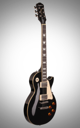

In [ ]:
im.to_thumb(128,128)

In [ ]:
failed = verify_images(fns)

In [ ]:
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
for fn in fns:
    im = Image.open(fn)
    if im.mode != 'RGB': im.convert('RGB').save(fn)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
data = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=10),
    get_y=parent_label,
    item_tfms=Resize(128,ResizeMethod.Squish))

In [ ]:
dls = data.dataloaders(path)

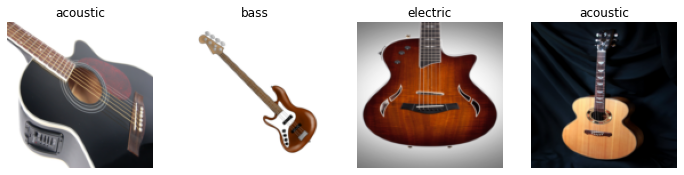

In [ ]:
dls.train.show_batch(max_n=4,nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.fine_tune(5)

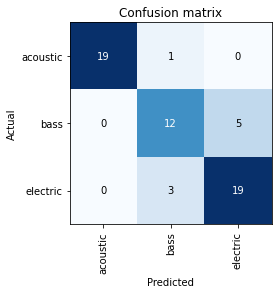

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

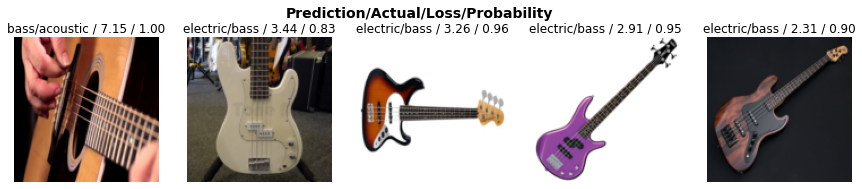

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
from ipywidgets import *

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
data = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=10),
    get_y=parent_label,
    item_tfms=Resize(224, ResizeMethod.Pad), 
    batch_tfms=aug_transforms(flip_vert=True))

In [ ]:
dls = data.dataloaders(path)

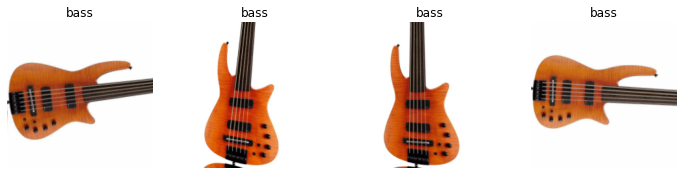

In [ ]:
dls.train.show_batch(max_n=4,nrows=1,unique=True)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

In [ ]:
learn.fine_tune(4)

In [ ]:
learn.export()

In [ ]:
!cp -r /content/data /content/gdrive/My\ Drive/guitar-classifier-data